![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises
## The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [3]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [4]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `film_rental_duration`?

In [5]:
# your code goes here
df['film_rental_duration'].mean()

4.935489902767389

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

<Axes: >

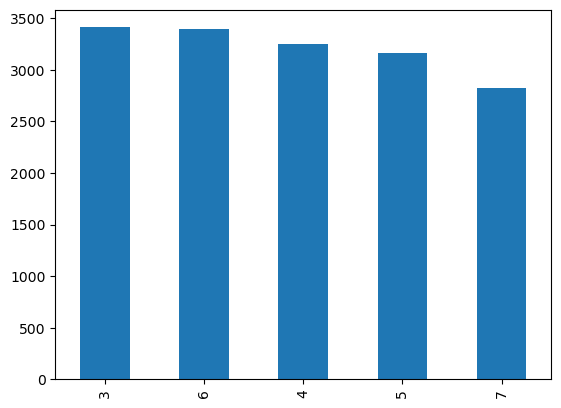

In [6]:
# your code goes here
df['film_rental_duration'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the most common rental rate?

- Show a <b>pie plot</b> with all possible rental rates.
- Show a <b>bar plot</b> with all possible rental rates.
- Which plot you think fits the best in this case? Why?

<Axes: ylabel='film_rental_rate'>

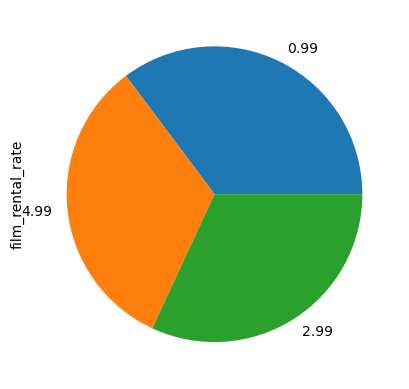

In [7]:
# your code goes here
df['film_rental_rate'].value_counts().plot(kind='pie')

<Axes: >

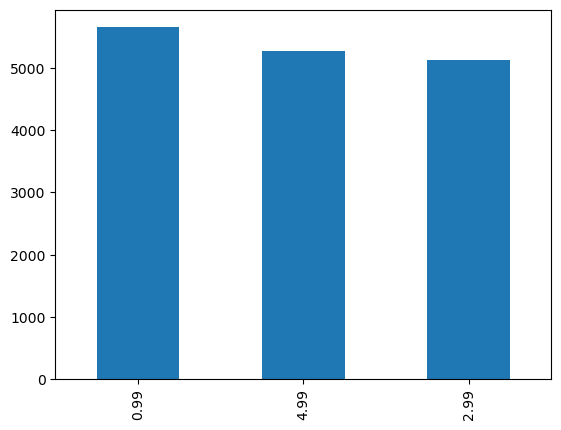

In [8]:
# your code goes here
df['film_rental_rate'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How is the replacement cost distributed?

- Show a <b>box plot</b> of the replacement costs.
- Show a <b>density plot</b> of the replacement costs.
- Add a red line on the <b>mean</b>.
- Add a green line on the median <b>median</b>.

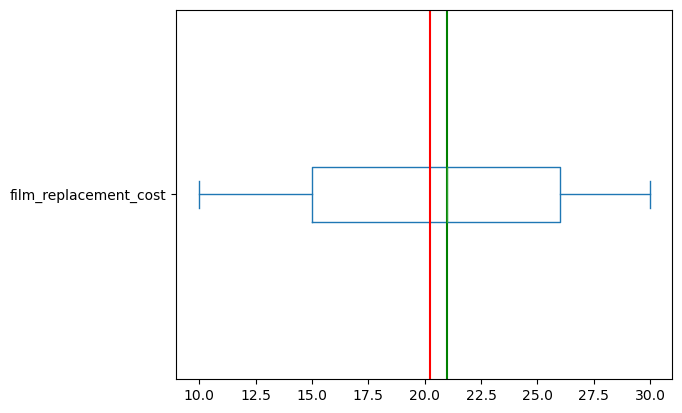

In [9]:
# your code goes here
box = df['film_replacement_cost'].plot(kind='box', vert=False)
box.axvline(df['film_replacement_cost'].mean(), color='red')
box.axvline(df['film_replacement_cost'].median(), color='green')

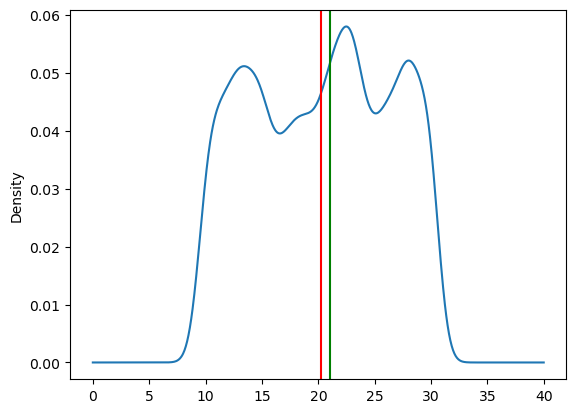

In [10]:
# your code goes here
box = df['film_replacement_cost'].plot(kind='density')
box.axvline(df['film_replacement_cost'].mean(), color='red')
box.axvline(df['film_replacement_cost'].median(), color='green')


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many films of each rating do we have?

- Show the raw count of each film rating.
- Show a <b>bar plot</b> with all possible film ratings.

In [11]:
# your code goes here
film = df['film_rating'].value_counts()
film

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<Axes: >

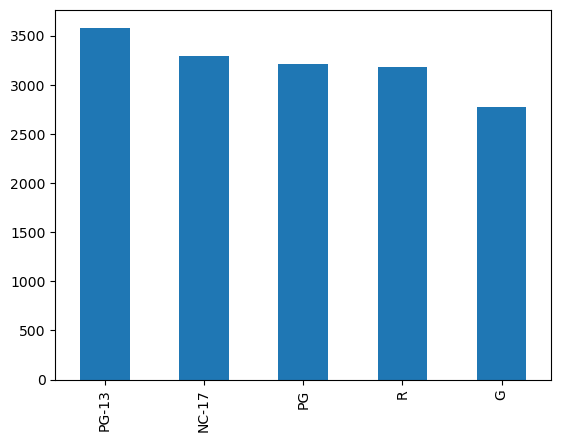

In [12]:
# your code goes here
film.plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

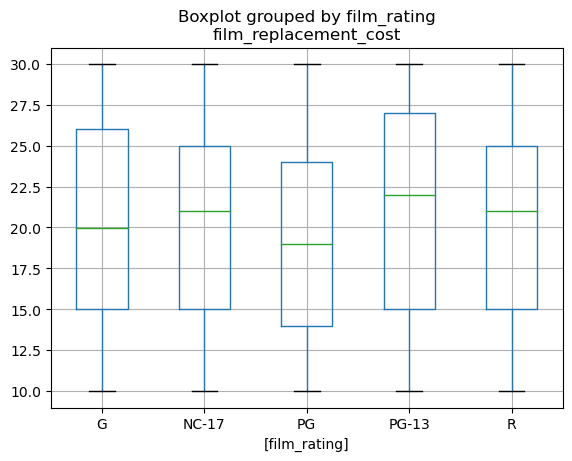

In [13]:
# your code goes here
df[['film_rating', 'film_replacement_cost']].boxplot(by='film_rating')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `rental_days` column

This numeric column should have the count of days between `rental_date` and `return_date`.

In [14]:
# your code goes here
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1]-x[0]).days, axis=1)
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `rental_days`

- Calculate the mean of `rental_days`.
- Show a <b>density (KDE)</b> of `rental_days`.

In [15]:
# your code goes here
df['rental_days'].mean()

4.525944139713763

<Axes: ylabel='Density'>

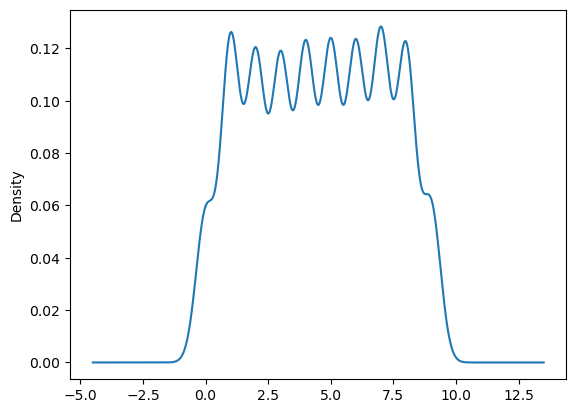

In [16]:
# your code goes here
df['rental_days'].plot(kind='density')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [17]:
# your code goes here
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

In [18]:
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [19]:
# your code goes here
df['film_daily_rental_rate'].mean()

0.6458262471655329

<Axes: ylabel='Density'>

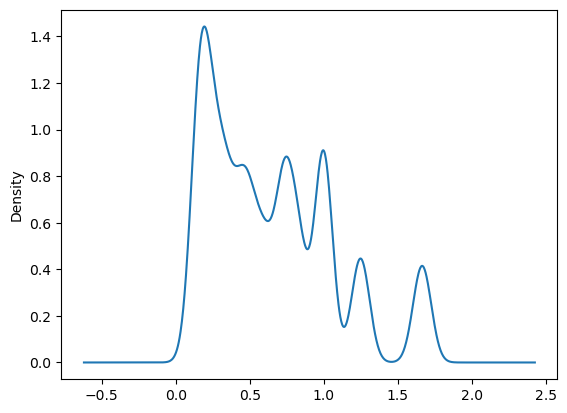

In [20]:
# your code goes here
df['film_daily_rental_rate'].plot(kind='density')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the lowest daily rental rate

In [21]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000


In [22]:
# your code goes here
df.sort_values(by='film_rental_rate').head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
16049,2005-08-23 22:50:12,2005-08-30 01:01:12,CAUSEY,2,Woodridge,MOB DUFFEL,4,0.99,25.99,G,6.0,0.247500
11320,2005-08-02 16:13:28,2005-08-05 21:23:28,BROWNLEE,1,Lethbridge,ROCKETEER MOTHER,3,0.99,27.99,PG-13,3.0,0.330000
4972,2005-07-08 23:56:09,2005-07-16 19:15:09,SANBORN,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,7.0,0.165000
4971,2005-07-08 23:54:49,2005-07-16 00:15:49,COX,1,Lethbridge,BROTHERHOOD BLANKET,3,0.99,26.99,R,7.0,0.330000
4969,2005-07-08 23:51:26,2005-07-12 03:21:26,JACOBS,1,Lethbridge,YOUNG LANGUAGE,6,0.99,9.99,G,3.0,0.165000
11326,2005-08-02 16:34:29,2005-08-03 17:40:29,ASHCRAFT,2,Woodridge,GRIT CLOCKWORK,3,0.99,21.99,PG,1.0,0.330000
4966,2005-07-08 23:47:25,2005-07-14 03:35:25,CRUZ,1,Lethbridge,VOYAGE LEGALLY,6,0.99,28.99,PG-13,5.0,0.165000
11330,2005-08-02 16:45:33,2005-08-04 15:15:33,SANDERS,2,Woodridge,VIETNAM SMOOCHY,7,0.99,27.99,PG-13,1.0,0.141429
11333,2005-08-02 16:53:00,2005-08-07 20:49:00,HARVEY,2,Woodridge,RIVER OUTLAW,4,0.99,29.99,PG-13,5.0,0.247500


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the highest daily rental rate

In [23]:
# your code goes here
df.sort_values(by='film_rental_rate', ascending=False).head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
8026,2005-07-28 16:05:38,2005-07-29 21:28:38,BENNER,2,Woodridge,TWISTED PIRATES,4,4.99,23.99,PG,1.0,1.247500
4764,2005-07-08 15:01:25,2005-07-17 15:16:25,FLORES,1,Lethbridge,DYING MAKER,5,4.99,28.99,PG,9.0,0.998000
4762,2005-07-08 14:54:42,2005-07-12 18:08:42,ADAMS,1,Lethbridge,BOOGIE AMELIE,6,4.99,11.99,R,4.0,0.831667
4761,2005-07-08 14:51:45,2005-07-14 20:28:45,FOUST,2,Woodridge,SECRETARY ROUGE,5,4.99,10.99,PG,6.0,0.998000
11171,2005-08-02 10:23:41,2005-08-04 14:22:41,PERRYMAN,2,Woodridge,PLATOON INSTINCT,6,4.99,10.99,PG-13,2.0,0.831667
4759,2005-07-08 14:39:22,2005-07-17 15:02:22,GREGORY,1,Lethbridge,SWEDEN SHINING,6,4.99,19.99,PG,9.0,0.831667
11172,2005-08-02 10:27:52,2005-08-11 12:47:52,PRICE,2,Woodridge,EARLY HOME,6,4.99,27.99,NC-17,9.0,0.831667
11179,2005-08-02 10:50:06,2005-08-04 05:24:06,BROWN,1,Lethbridge,WANDA CHAMBER,7,4.99,23.99,PG-13,1.0,0.712857
4752,2005-07-08 14:15:20,2005-07-12 13:22:20,VINES,2,Woodridge,RANGE MOONWALKER,3,4.99,25.99,PG,3.0,1.663333


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Lethbridge city?

In [24]:
# your code goes here
df[df['rental_store_city']=='Lethbridge'].shape[0]

7923

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [25]:
# your code goes here
df[df['rental_store_city']=='Lethbridge']['film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

In [26]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [27]:
# your code goes here
df[(df['film_rental_duration'] > 5) & (df['rental_store_city'] == 'Woodridge')].shape[0]

3186

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [28]:
# your code goes here
df[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]

8444

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)